# Analysis of results for the paper

In [1]:
import pandas as pd
import seaborn as sns
from statistics import median
from typing import Union, List
from pandas import DataFrame
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as np

from qdax.utils.plotting import plot_2d_map_elites_repertoire_for_pgfplots
from scipy.stats import ranksums

In [2]:
%matplotlib inline

In [3]:
import os

In [4]:
dfs = []
algo_mapping = {
    "all": "3b", "s1": "brain", "s2": "body", "s3": "behavior", "ga": "ga"
}
for seed in range(10):
    for controller in ["nn", "graph"]:
        for sampler in algo_mapping.keys():
            tmp_df = pd.read_csv(
                f"../paper_results/ga/evobb_{controller}_{seed}.csv") if sampler == "ga" else pd.read_csv(
                f"../paper_results/me/evobb_{controller}_{algo_mapping[sampler]}_{seed}.csv")
            tmp_df["algorithm"] = algo_mapping[sampler]
            tmp_df["seed"] = seed
            tmp_df["controller"] = controller
            dfs.append(tmp_df)
df = pd.concat(dfs, ignore_index=True)
df.head()

,iteration,max_fitness,qd_score1,qd_score2,qd_score3,coverage1,coverage2,coverage3,time,current_time,invalid_individuals,algorithm,seed,controller
0,1,0.562116,5.652280,3.231952,2.908106,2.929688,6.640625,2.246094,11.388924,2024-12-02 13:35:18.571949,0.0,3b,0,nn
1,2,0.562116,7.412463,4.919590,3.104527,3.125000,8.593750,2.734375,5.778678,2024-12-02 13:35:24.350963,0.0,3b,0,nn
2,3,0.562116,8.975650,8.650234,3.866097,3.222656,10.058594,2.929688,5.733377,2024-12-02 13:35:30.084858,0.0,3b,0,nn
3,4,0.609543,10.033884,11.207098,4.322552,3.320312,11.523438,2.929688,5.646115,2024-12-02 13:35:35.731445,0.0,3b,0,nn
4,5,0.609543,10.713839,14.359545,4.868412,3.320312,12.304688,3.222656,5.769140,2024-12-02 13:35:41.501045,0.0,3b,0,nn


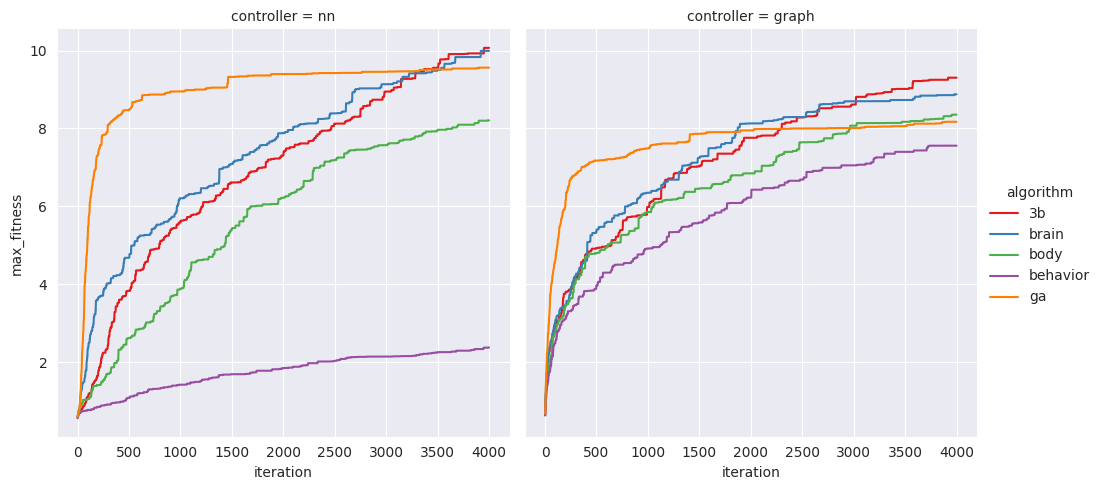

In [5]:
sns.relplot(
    data=df, x="iteration", y="max_fitness", col="controller",
    hue="algorithm", kind="line", errorbar=None, palette="Set1",
)
plt.show()

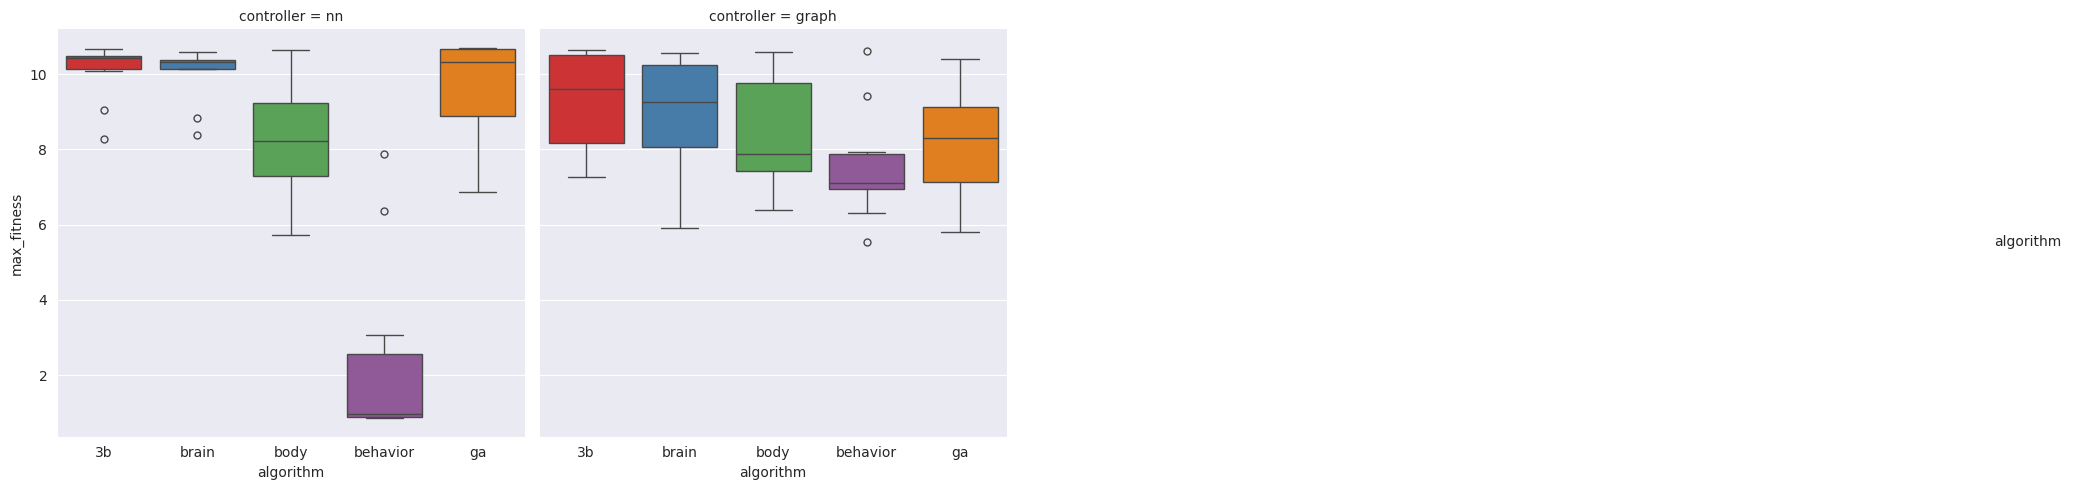

In [6]:
final_df = df[df["iteration"] == max(df["iteration"])]
sns.catplot(final_df,
            x="algorithm",
            y="max_fitness",
            col="controller",
            col_wrap=4,
            hue="algorithm",
            palette="Set1",
            kind="box",
            )
plt.show()

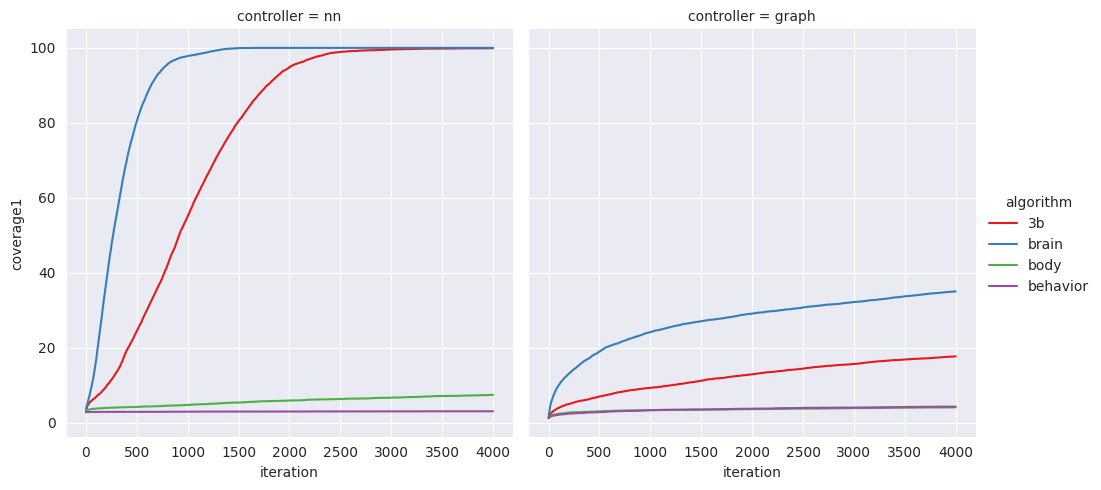

In [7]:
me_df = df[df["algorithm"] != "ga"]
sns.relplot(
    data=me_df, x="iteration", y="coverage1", col="controller",
    hue="algorithm", kind="line", errorbar=None, palette="Set1",
)
plt.show()

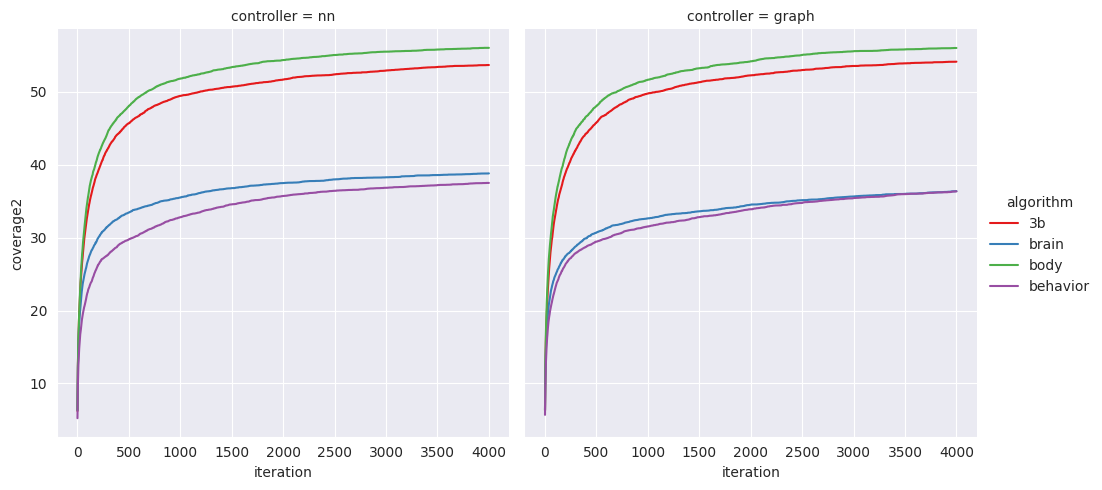

In [8]:
sns.relplot(
    data=me_df, x="iteration", y="coverage2", col="controller",
    hue="algorithm", kind="line", errorbar=None, palette="Set1",
)
plt.show()

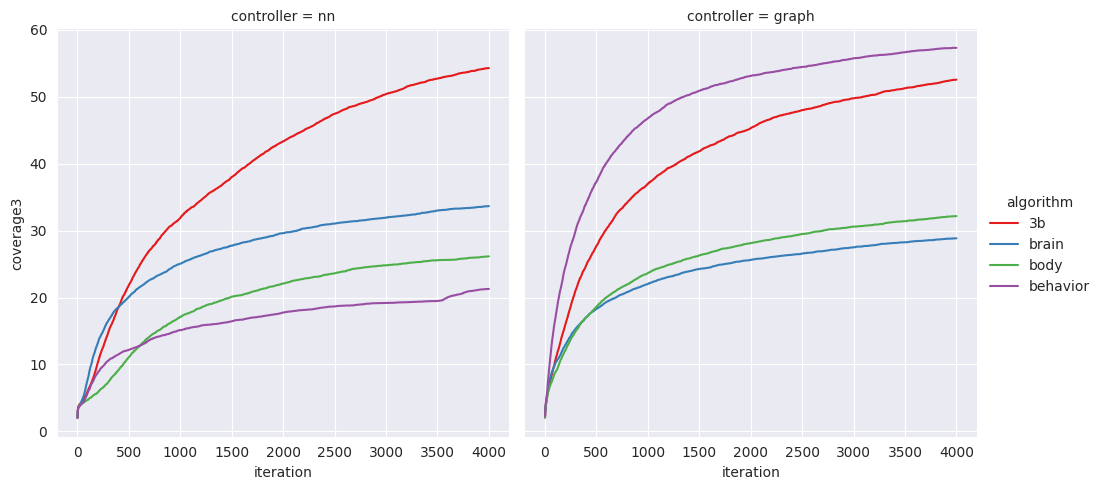

In [9]:
sns.relplot(
    data=me_df, x="iteration", y="coverage3", col="controller",
    hue="algorithm", kind="line", errorbar=None, palette="Set1",
)
plt.show()

In [10]:
tasks_extra_data = {
    "BridgeWalker-v0": ("walking", 6.6),
    "BidirectionalWalker-v0": ("walking", 8.7),

    "CustomCarrier-v0": ("object", 10.8),
    "CustomPusher-v0": ("object", 9.5),
    "Pusher-v1": ("object", 8.2),
    "Catcher-v0": ("object", -1.2),
    "BeamToppler-v0": ("object", 9.2),

    "UpStepper-v0": ("locomotion", 7.8),
    "DownStepper-v0": ("locomotion", 9.1),
    "ObstacleTraverser-v0": ("locomotion", 9.5),
    "ObstacleTraverser-v1": ("locomotion", 5.1),
    "Hurdler-v0": ("locomotion", 4.2),
    "PlatformJumper-v0": ("locomotion", 5.8),
    "GapJumper-v0": ("locomotion", 7.8),
    "Traverser-v0": ("locomotion", 5.9),
    "CaveCrawler-v0": ("locomotion", 5.6),

    "AreaMaximizer-v0": ("shape", 2.8),
    "AreaMinimizer-v0": ("shape", 1),
    "WingspanMazimizer-v0": ("shape", .87),
    "HeightMaximizer-v0": ("shape", .5),

    "Flipper-v0": ("misc", 48.3),
    "Jumper-v0": ("misc", 4.9),
    "Balancer-v0": ("misc", .16),
}

tasks = dict(tasks_extra_data)
tasks_df_dicts = []
for task_name, task_extra_info in tasks.items():
    tasks_df_dicts.append({
        "task": task_name,
        "type": task_extra_info[0],
        "max_reward": task_extra_info[1],
    })
tasks_df = pd.DataFrame(tasks_df_dicts)
tasks_df.head()

,task,type,max_reward
0,BridgeWalker-v0,walking,6.6
1,BidirectionalWalker-v0,walking,8.7
2,CustomCarrier-v0,object,10.8
3,CustomPusher-v0,object,9.5
4,Pusher-v1,object,8.2


In [11]:
solved_tasks = [
    "BridgeWalker-v0",
    "UpStepper-v0",
    "DownStepper-v0",
    "ObstacleTraverser-v0",
    "ObstacleTraverser-v1",
    "Hurdler-v0",
    "PlatformJumper-v0",
    "GapJumper-v0",
    "Traverser-v0",
    "CaveCrawler-v0",
    "CustomCarrier-v0",
    "CustomPusher-v0",
    "Catcher-v0",
    "BeamToppler-v0",
    "AreaMinimizer-v0",
    "WingspanMazimizer-v0",
    "HeightMaximizer-v0",
    "Balancer-v0",
]

In [12]:
transfer_dfs = []  #[final_df]
samplings = algo_mapping.values()
repertoires = [f"g{i + 1}" for i in range(3)]
for task in tasks:
    for controller in ["graph", "nn"]:
        for seed in range(10):
            for sampler in samplings:
                if sampler == "ga":
                    tmp_df = pd.read_csv(f"../paper_results/ga_transfer/evobb_{controller}_{seed}_{task}.csv")
                    tmp_df["seed"] = seed
                    tmp_df["task"] = task
                    tmp_df["algorithm"] = "ga"
                    tmp_df["repertoire"] = "all"
                    tmp_df["controller"] = controller
                    tmp_df["max_fitness"] = tmp_df["max_fitness"].apply(
                        lambda x: float(x.replace("[", "").replace("]", "")))
                    transfer_dfs.append(tmp_df)
                else:
                    for rep in repertoires:
                        tmp_df = pd.read_csv(
                            f"../paper_results/me_transfer/evobb_{controller}_{sampler}_{seed}_{rep}_{task}.csv")
                        tmp_df["seed"] = seed
                        tmp_df["task"] = task
                        tmp_df["algorithm"] = sampler
                        tmp_df["repertoire"] = rep
                        tmp_df["controller"] = controller
                        # tmp_df["max_fitness"] = tmp_df["max_fitness"].apply(lambda x: float(x.replace("[", "").replace("]", "")))
                        transfer_dfs.append(tmp_df)

df_transferred = pd.concat(transfer_dfs, ignore_index=True)


def assign_task_type(row):
    return tasks_extra_data[row.task][0]


def assign_expected_reward_type(row):
    return tasks_extra_data[row.task][1]


df_transferred["task_type"] = df_transferred.apply(assign_task_type, axis=1)
df_transferred["task_expected_reward"] = df_transferred.apply(assign_expected_reward_type, axis=1)
df_transferred.head()

,max_fitness,coverage1,coverage2,coverage3,seed,task,algorithm,repertoire,controller,task_type,task_expected_reward
0,4.959429,4.882812,3.417969,2.050781,0,BridgeWalker-v0,3b,g1,graph,walking,6.6
1,6.391897,0.292969,4.882812,1.269531,0,BridgeWalker-v0,3b,g2,graph,walking,6.6
2,6.391897,0.390625,3.515625,1.660156,0,BridgeWalker-v0,3b,g3,graph,walking,6.6
3,3.316065,4.882812,0.976562,0.878906,0,BridgeWalker-v0,brain,g1,graph,walking,6.6
4,3.302593,3.027344,4.882812,1.464844,0,BridgeWalker-v0,brain,g2,graph,walking,6.6


In [13]:
df_transferred["solve_fraction"] = df_transferred["max_fitness"] / df_transferred["task_expected_reward"]
df_transferred["task_with_type"] = df_transferred["task_type"].str[0].str.upper() + "-" + \
                                   df_transferred["task"]
df_transferred_and_solved = df_transferred[df_transferred["task"].isin(solved_tasks)]
df_best_transfer_per_evo_way_int = df_transferred_and_solved.loc[
    df_transferred_and_solved.groupby(["task_with_type", "task", "task_type", "algorithm", "seed", "controller"])[
        "max_fitness"].idxmax()]

In [14]:
df_best_transfer_per_evo_way_int["rank"] = \
    df_best_transfer_per_evo_way_int.groupby(["task_with_type", "controller"])[
        "max_fitness"].rank(
        method="dense",
        ascending=True)  / 50.
df_best_transfer_per_evo_way = \
    df_best_transfer_per_evo_way_int.groupby(["task", "task_type", "task_with_type", "algorithm", "controller"])[
        "rank"].mean().reset_index()
df_best_transferred_mean_solve_fraction = \
    df_transferred.groupby(["task", "task_type", "task_with_type", "algorithm", "controller"])[
        "solve_fraction"].mean().reset_index()
df_best_transfer_per_evo_way.head()

,task,task_type,task_with_type,algorithm,controller,rank
0,AreaMinimizer-v0,shape,S-AreaMinimizer-v0,3b,graph,0.696
1,AreaMinimizer-v0,shape,S-AreaMinimizer-v0,3b,nn,0.460
2,AreaMinimizer-v0,shape,S-AreaMinimizer-v0,behavior,graph,0.524
3,AreaMinimizer-v0,shape,S-AreaMinimizer-v0,behavior,nn,0.668
4,AreaMinimizer-v0,shape,S-AreaMinimizer-v0,body,graph,0.656


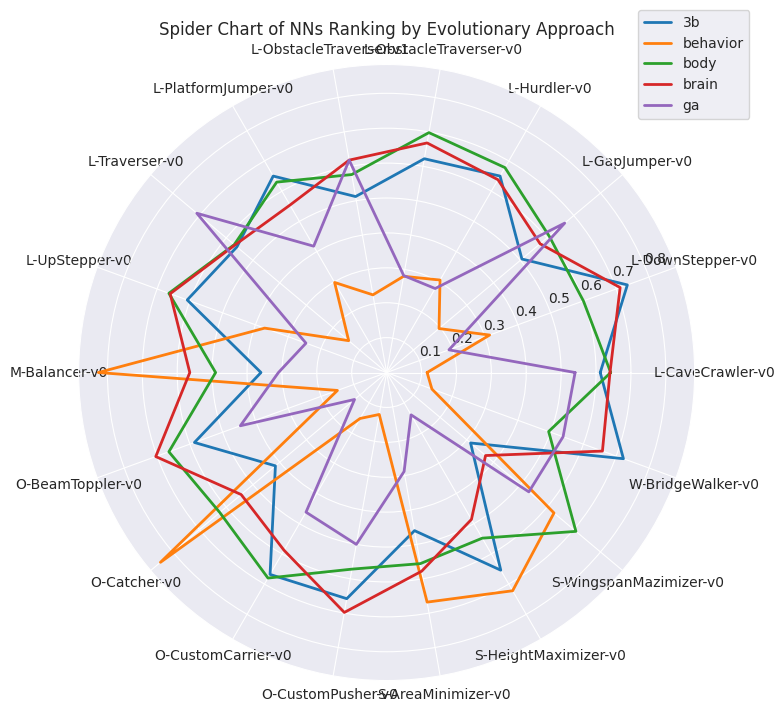

In [15]:
df_best_transfer_per_evo_way_pivot_nn = df_best_transfer_per_evo_way[
    df_best_transfer_per_evo_way["controller"] == "nn"].pivot(index="algorithm", columns="task_with_type",
                                                              values="rank")
categories = df_best_transfer_per_evo_way_pivot_nn.columns.tolist()  # Tasks as categories
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for sampling, row in df_best_transfer_per_evo_way_pivot_nn.iterrows():
    values = row.tolist()
    values += values[:1]  # Close the shape
    ax.plot(angles, values, label=sampling, linewidth=2)
    # ax.fill(angles, values, alpha=0.25)
# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.title("Spider Chart of NNs Ranking by Evolutionary Approach")

plt.show()

In [19]:
df_best_transfer_per_evo_way_pivot_nn.head()
ranked_df_best_transfer_per_evo_way_pivot_nn = df_best_transfer_per_evo_way_pivot_nn.rank(ascending=False)
ranked_df_best_transfer_per_evo_way_pivot_nn['average_rank'] = ranked_df_best_transfer_per_evo_way_pivot_nn.mean(axis=1)
ranked_df_best_transfer_per_evo_way_pivot_nn[['average_rank']].head()

task_with_type,average_rank
algorithm,
3b,2.888889
behavior,3.777778
body,2.111111
brain,2.416667
ga,3.805556


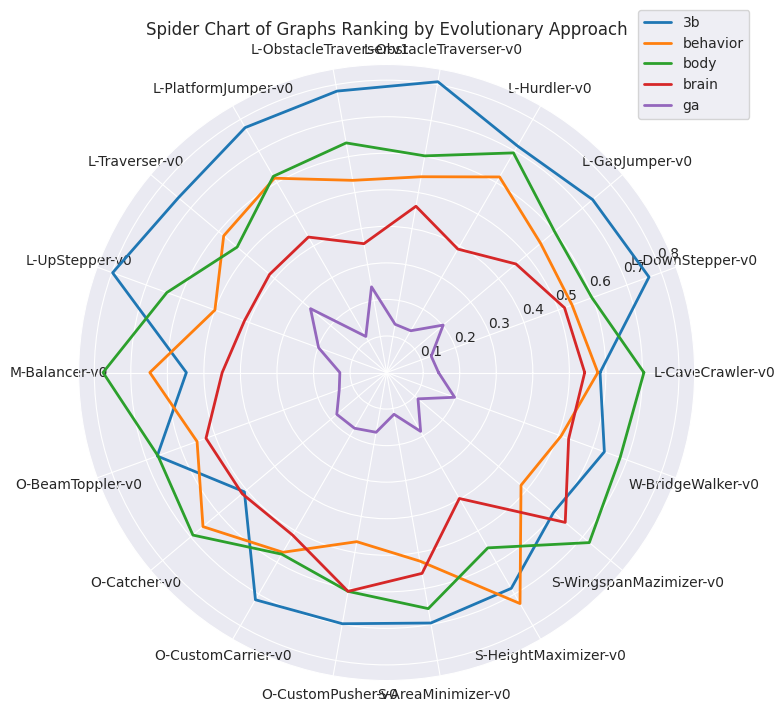

In [21]:
df_best_transfer_per_evo_way_pivot_graph = df_best_transfer_per_evo_way[
    df_best_transfer_per_evo_way["controller"] == "graph"].pivot(index="algorithm", columns="task_with_type",
                                                                 values="rank")
categories = df_best_transfer_per_evo_way_pivot_graph.columns.tolist()  # Tasks as categories
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for sampling, row in df_best_transfer_per_evo_way_pivot_graph.iterrows():
    values = row.tolist()
    values += values[:1]  # Close the shape
    ax.plot(angles, values, label=sampling, linewidth=2)
    # ax.fill(angles, values, alpha=0.25)
# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.title("Spider Chart of Graphs Ranking by Evolutionary Approach")

plt.show()

In [22]:
df_best_transfer_per_evo_way_pivot_graph.head()
ranked_df_best_transfer_per_evo_way_pivot_graph = df_best_transfer_per_evo_way_pivot_graph.rank(ascending=False)
ranked_df_best_transfer_per_evo_way_pivot_graph['average_rank'] = ranked_df_best_transfer_per_evo_way_pivot_graph.mean(axis=1)
ranked_df_best_transfer_per_evo_way_pivot_graph[['average_rank']].head()

task_with_type,average_rank
algorithm,
3b,1.555556
behavior,2.944444
body,1.861111
brain,3.638889
ga,5.000000
